In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme()

In [4]:
df= pd.read_csv('missingValue.csv')

# **Show Missing Value**

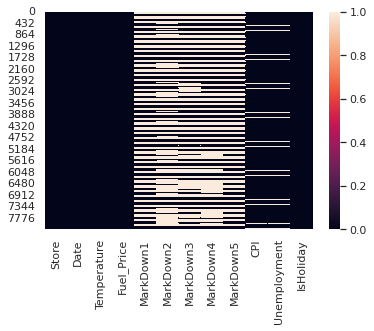

In [10]:
sns.heatmap(df.isnull())
plt.show()

# Find Percentage of Missing value



In [ ]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown2       64.33
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64


# **1- Remove**

If our number of rows which have missing values are less, or our data is such that it is not advised to fill in missing values, then we can drop the missing rows by using dropna in pandas.

In [ ]:
#Drop rows with missing target
#df.dropna(axis=0, subset=['Target'], inplace=True)

In [ ]:
# Drop columns that have more than 60 percent missing value
min_count =  int(((100-60)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)


In [ ]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       50.77
MarkDown3       55.89
MarkDown4       57.70
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
IsHoliday        0.00
dtype: float64


# **2- Data imputation techniques and replace them with new value**


•	If **“mean”**, then replace missing values using the mean along each column. Can only be used with numeric data.

•	If **“median”**, then replace missing values using the median along each column. Can only be used with numeric data.

•	If “**most_frequent**”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.If there is more than one such value, only the smallest is returned.

•	If **“constant”**, then replace missing values with fill_value. Can be used with strings or numeric data.



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df.iloc[:, 4:8])
df.iloc[:, 4:8] = imputer.transform(df.iloc[:, 4:8])

In [ ]:
df.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

# **3- Prediction Values**

**k-NN:**

 The k nearest neighbors is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbors to the observation with missing data and then imputing them based on the non-missing values in the neighborhoods. Let’s see some example code using “Impyute” library which provides a simple and easy way to use KNN for imputation:


In [ ]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[['CPI','Unemployment']] = imputer.fit_transform(df[['CPI','Unemployment']])
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64